In [41]:
#neccessary packages

!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
virome_path = '/content/drive/MyDrive/Mosquito_Virome.csv'
eco_path = '/content/drive/MyDrive/eco-data_dataset1.csv'
virome_df = pd.read_csv(virome_path)
eco_df = pd.read_csv(eco_path)
print(virome_df.head())
print(eco_df.head())

     CollectionPeriod       SiteID          VirusName  Abundance
0  Week1(12May-18May)  NB-STJFLB-1             Dengue      14.62
1  Week1(12May-18May)  NB-STJFLB-1               Ziki      25.98
2  Week1(12May-18May)  NB-STJFLB-1          West Nile      25.31
3  Week1(12May-18May)  NB-STJFLB-1         Ross River       8.67
4  Week1(12May-18May)  NB-STJFLB-1  Rift Valley Fever      25.43
  Time        Date      Site ID  Latitude  Longitude Trap Day  Precipitation  \
0  NaN  2024-05-09  NB-STJFLB-1  45.29606 -66.059566       No            7.8   
1  NaN  2024-05-10  NB-STJFLB-1  45.29606 -66.059566       No            0.0   
2  NaN  2024-05-11  NB-STJFLB-1  45.29606 -66.059566       No            0.0   
3  NaN  2024-05-12  NB-STJFLB-1  45.29606 -66.059566       No            0.0   
4  NaN  2024-05-13  NB-STJFLB-1  45.29606 -66.059566       No            0.0   

   Average Temperature  Min Temperatures  Max Temperature   Humidity  \
0                  6.5               3.4              7.6

In [6]:
'''
combine every virus in siteID, Remove everything besides trap day Yes from second
combine them
For every site do linear regression on each ecological point
create plots



process the data so it's usable
combine with eco data
linear regression for coorelation between:
each eco data and virome percents
'''

"\nprocess the data so it's usable\ncombine with eco data\nlinear regression for coorelation between:\neach eco data and virome percents\n"

In [16]:
print(eco_df.keys())

Index(['Time', 'Date', 'Site ID', 'Latitude', 'Longitude', 'Trap Day',
       'Precipitation', 'Average Temperature', 'Min Temperatures',
       'Max Temperature', 'Humidity', 'Trap Duration',
       'Days Since Last Rainfall'],
      dtype='object')


In [4]:
#grabs all unique dates
site_dates = virome_df['CollectionPeriod']
site_dates = set(site_dates)


#grab every site ID
site_ids = virome_df['SiteID']
site_ids = set(site_ids)


all_dates = []
for site_date in site_dates:
    date_data = virome_df.loc[virome_df['CollectionPeriod'] == site_date]

    date_collection = [site_date]
    for site_id in site_ids:
        site_virus_mapping = {}
        site_data = date_data.loc[date_data['SiteID'] == site_id]
        viruses = site_data['VirusName']
        abundance = site_data['Abundance']
        virus_abundance = list(zip(list(viruses), list(abundance)))
        site_virus_mapping[site_id] = virus_abundance
        date_collection.append(site_virus_mapping)

    all_dates.append(date_collection)

virome_data = sorted(all_dates, key=lambda x : x[0][4])
for v in virome_data:
    print(v)

# virome data:
#[date,{ virome1:[virus:relative percent, ...], ...}]

['Week1(12May-18May)', {'NS-HFXFRP-1': [('Dengue', 5.65), ('Ziki', 14.44), ('West Nile', 16.77), ('Ross River', 11.73), ('Rift Valley Fever', 14.37), ('Dengue', 5.89), ('Ziki', 13.49), ('West Nile', 1.3), ('Ross River', 5.03), ('Rift Valley Fever', 11.33)]}, {'NB-STJLRB-1': [('Dengue', 19.78), ('Ziki', 7.3), ('West Nile', 10.54), ('Ross River', 1.26), ('Rift Valley Fever', 16.89), ('Dengue', 6.14), ('Ziki', 19.83), ('West Nile', 1.45), ('Ross River', 5.8), ('Rift Valley Fever', 11.02)]}, {'NB-STJREV-1': [('Dengue', 14.6), ('Ziki', 13.7), ('West Nile', 7.72), ('Ross River', 10.47), ('Rift Valley Fever', 5.06), ('Dengue', 7.08), ('Ziki', 17.51), ('West Nile', 1.47), ('Ross River', 6.81), ('Rift Valley Fever', 15.57)]}, {nan: []}, {'NB-WESCEN-2': [('Dengue', 1.2), ('Ziki', 20.69), ('West Nile', 6.02), ('Ross River', 0.97), ('Rift Valley Fever', 19.83), ('Dengue', 8.52), ('Ziki', 19.98), ('West Nile', 1.34), ('Ross River', 7.53), ('Rift Valley Fever', 13.91)]}, {'NB-STJFLB-1': [('Dengue', 

In [22]:
trap_day_yes = eco_df[eco_df['Trap Day'] == 'Yes']
unique_trap_days = trap_day_yes.drop_duplicates(subset=['Date', 'Site ID'])

print(unique_trap_days.shape[0])
unique_trap_days.head()


108


,Time,Date,Site ID,Latitude,Longitude,Trap Day,Precipitation,Average Temperature,Min Temperatures,Max Temperature,Humidity,Trap Duration,Days Since Last Rainfall
7,NaN,2024-05-16,NB-STJFLB-1,45.296060,-66.059566,Yes,0.0,15.5,8.4,23.4,80.25,15:00:00,7.0
15,00:00:00,2024-05-17,NB-STJFLB-1,45.296060,-66.059566,Yes,0.0,16.7,16.7,16.7,77.00,15:00:00,7.0
38,NaN,2024-05-16,NB-STJLRB-1,45.322500,-65.930100,Yes,0.0,15.5,8.4,23.4,80.25,16:00:00,7.0
46,00:00:00,2024-05-17,NB-STJLRB-1,45.322500,-65.930100,Yes,0.0,16.7,16.7,16.7,77.00,16:00:00,7.0
70,NaN,2024-05-16,NB-STJREV-1,45.265044,-66.087700,Yes,0.0,15.5,8.4,23.4,80.25,14:00:00,7.0


In [26]:
unique_trap_days.iloc[2]['Date']


'2024-05-16'

In [35]:
from itertools import takewhile
from datetime import datetime

viruses_regression = {'Dengue':[[],[],[],[]], 'Ziki':[[],[],[],[]], 'West Nile':[[],[],[],[]], 'Ross River':[[],[],[],[]], 'Rift Valley Fever':[[],[],[],[]]}

i=0
for data in virome_data:
  # convert to date format
  date = data[0].split("(")[1][:-1]
  start = date.split("-")[0]
  end = date.split("-")[1]
  day = ''.join(takewhile(str.isdigit, start))
  month = ''.join(takewhile(str.isalpha, start[len(day):]))
  start = day + '-'+ month + '-2024'
  day = ''.join(takewhile(str.isdigit, end))
  month = ''.join(takewhile(str.isalpha, end[len(day):]))
  end = day + '-'+ month + '-2024'


  start = datetime.strptime(start, "%d-%b-%Y")
  end = datetime.strptime(end, "%d-%b-%Y")

  virome_info = data[1]

  while datetime.strptime(unique_trap_days.iloc[i]['Date'], "%Y-%m-%d") <= end:
      site_id = unique_trap_days.iloc[i]['Site ID']
      humidity = unique_trap_days.iloc[i]['Humidity']
      avg_temp = unique_trap_days.iloc[i]['Average Temperature']
      precipitation = unique_trap_days.iloc[i]['Precipitation']

      ind_virome = virome_info.get(site_id)
      if ind_virome is None:
        i+=1
        continue
      for virus,abundance in ind_virome:
          viruses_regression[virus][0].append(humidity if not np.isnan(humidity) else 0.0)
          viruses_regression[virus][1].append(avg_temp if not np.isnan(avg_temp) else 0.0)
          viruses_regression[virus][2].append(precipitation if not np.isnan(precipitation) else 0.0)
          viruses_regression[virus][3].append(abundance if not np.isnan(abundance) else 0.0)
      i+=1



In [ ]:
'''
given a site ID and a specific virus
[humidity, avg temp, precipitation, target=virus_abundance]
{virus_name : [[],[],[],[]]}
'''

In [36]:
print(viruses_regression)

{'Dengue': [[89.45833333, 89.45833333, 100.0, 100.0, 99.91666667, 99.91666667, 99.0, 99.0, 76.0, 76.0, 50.0, 50.0, 76.875, 76.875, 79.0, 79.0, 84.125, 84.125, 96.0, 96.0, 72.29166667, 72.29166667], [10.4, 10.4, 8.9, 8.9, 12.1, 12.1, 11.7, 11.7, 16.7, 16.7, 17.9, 17.9, 21.0, 21.0, 18.8, 18.8, 18.8, 18.8, 19.6, 19.6, 16.4, 16.4], [0.0, 0.0, 0.0, 0.0, 1.6, 1.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0], [5.65, 5.89, 13.0, 5.75, 13.0, 5.75, 18.46, 6.36, 18.46, 6.36, 18.46, 6.36, 1.01, 8.35, 1.01, 8.35, 1.01, 8.35, 1.01, 8.35, 3.27, 8.8]], 'Ziki': [[89.45833333, 89.45833333, 100.0, 100.0, 99.91666667, 99.91666667, 99.0, 99.0, 76.0, 76.0, 50.0, 50.0, 76.875, 76.875, 79.0, 79.0, 84.125, 84.125, 96.0, 96.0, 72.29166667, 72.29166667], [10.4, 10.4, 8.9, 8.9, 12.1, 12.1, 11.7, 11.7, 16.7, 16.7, 17.9, 17.9, 21.0, 21.0, 18.8, 18.8, 18.8, 18.8, 19.6, 19.6, 16.4, 16.4], [0.0, 0.0, 0.0, 0.0, 1.6, 1.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.0

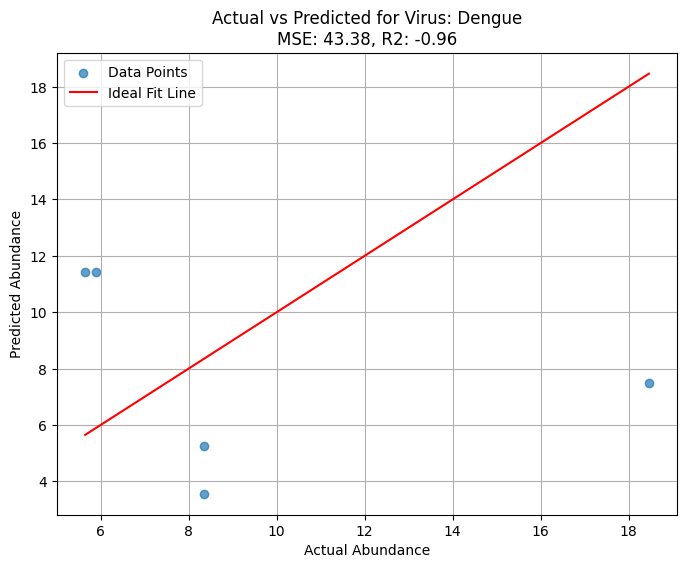

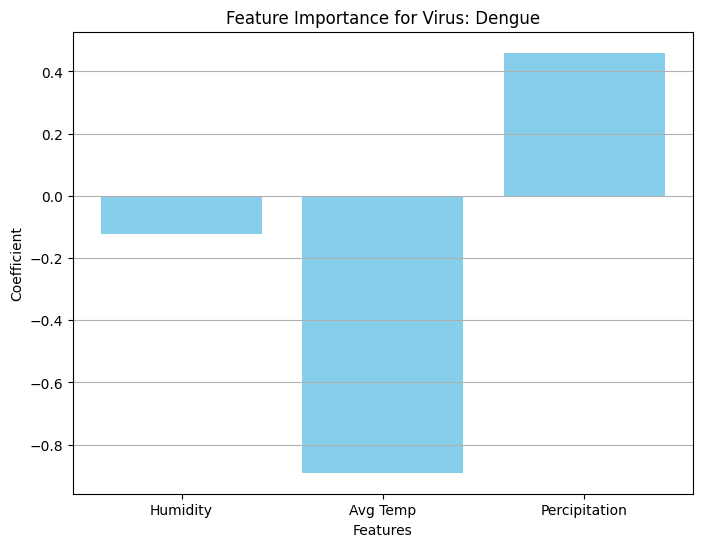

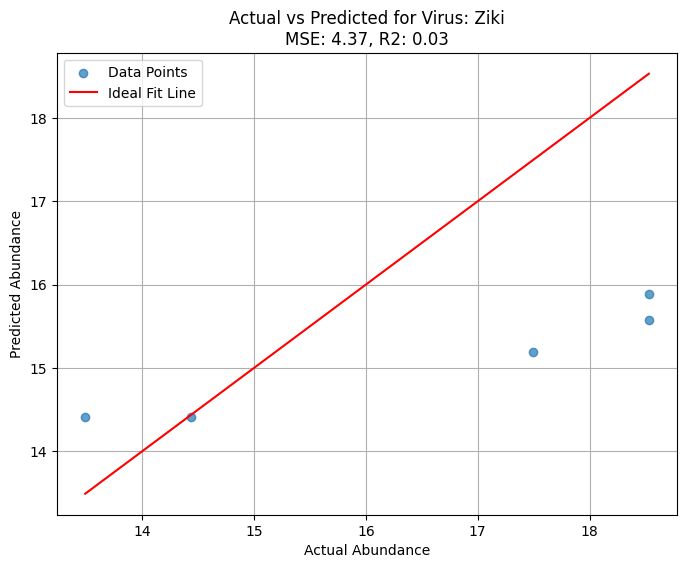

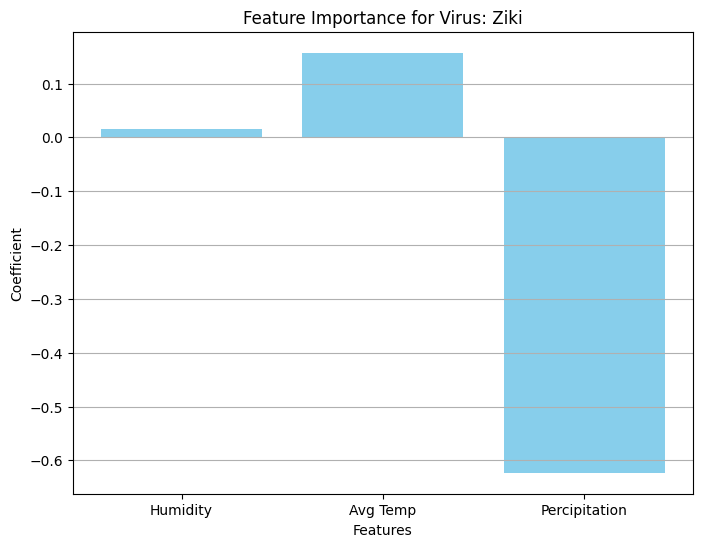

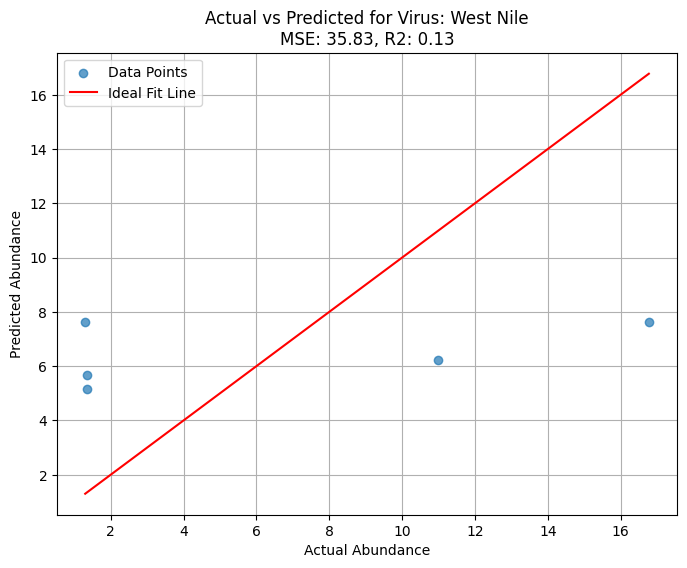

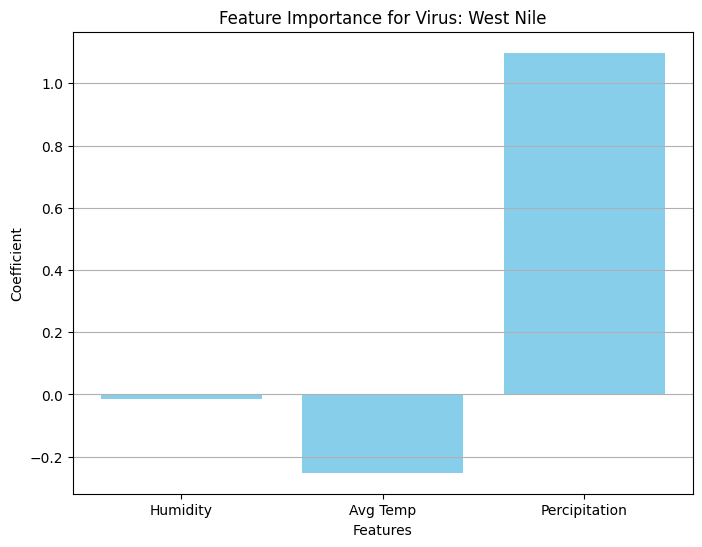

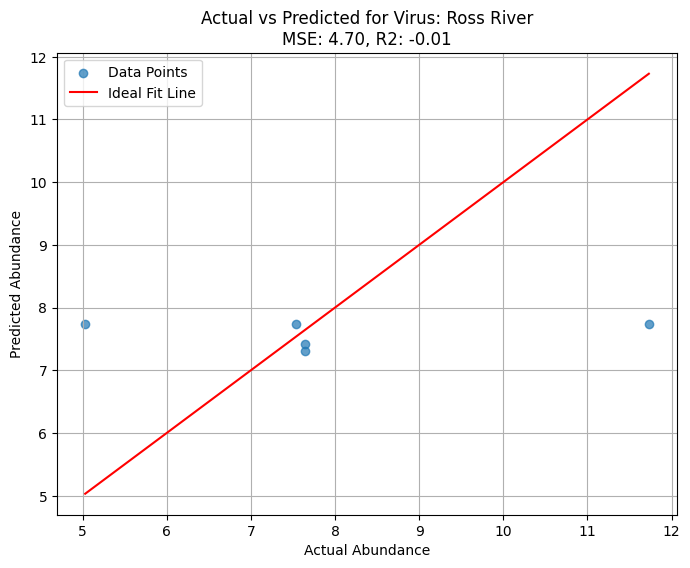

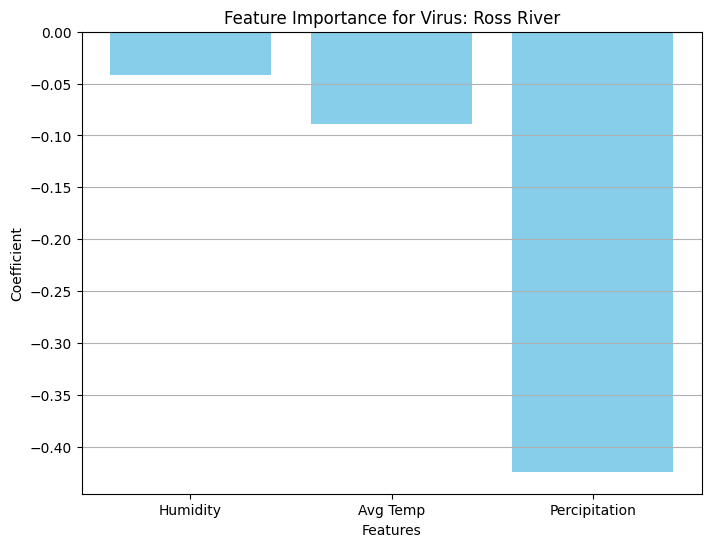

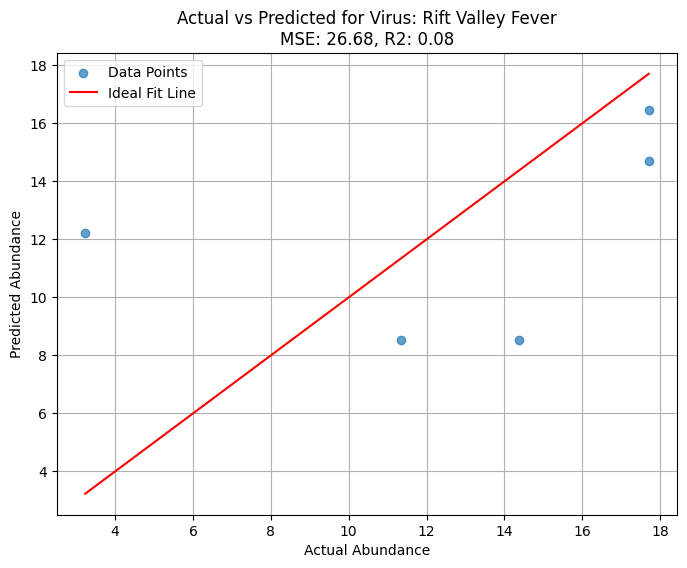

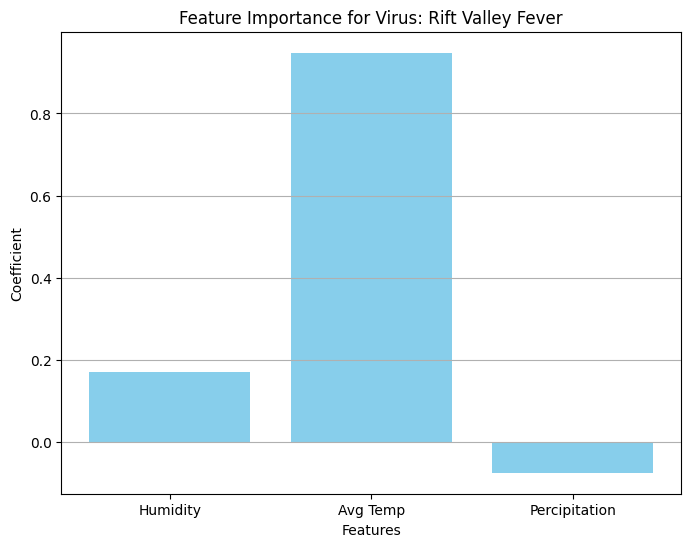

In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


for key in viruses_regression.keys():
  virus_data = viruses_regression[key]
  df = pd.DataFrame(virus_data).transpose()
  df.columns = ['Humidity', 'Avg Temp', 'Percipitation', 'Abundance']

  X = df[['Humidity', 'Avg Temp', 'Percipitation']]
  y = df["Abundance"]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.7, label='Data Points')
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit Line')
  plt.xlabel("Actual Abundance")
  plt.ylabel("Predicted Abundance")
  plt.title(f"Actual vs Predicted for Virus: {key}\nMSE: {mse:.2f}, R2: {r2:.2f}")
  plt.legend()
  plt.grid()
  plt.show()


  coefficients = model.coef_
  feature_names = X.columns

  plt.figure(figsize=(8, 6))
  plt.bar(feature_names, coefficients, color='skyblue')
  plt.xlabel("Features")
  plt.ylabel("Coefficient")
  plt.title(f"Feature Importance for Virus: {key}")
  plt.grid(axis='y')
  plt.show()
